In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import os
import time

In [2]:
# Shell command to check GPU usage: nvidia-smi
# Execute if you do not want the GPU to be used:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
fp = open("hw0_dataset.pkl", "rb")
foo = pickle.load(fp)
fp.close()

### what is foo?

In [4]:
foo

{'ins': array([[ 1., -1., -1., ...,  1.,  1., -1.],
        [-1., -1.,  1., ...,  1., -1., -1.],
        [ 1., -1.,  1., ...,  1., -1.,  1.],
        ...,
        [ 1., -1., -1., ...,  1., -1., -1.],
        [ 1., -1.,  1., ...,  1., -1., -1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]]),
 'outs': array([[-1.],
        [ 1.],
        [ 1.],
        ...,
        [-1.],
        [-1.],
        [ 1.]])}

foo is a dictionary.
let's assign the contents to variables.

In [5]:
ins = foo['ins']
outs = foo['outs']

In [6]:
print(ins.shape, outs.shape)

(1024, 10) (1024, 1)


In [7]:
for i in range(0,10):
    print(sum(ins[i])/2, outs[i])

-1.0 [-1.]
0.0 [1.]
0.0 [1.]
0.0 [1.]
-1.0 [-1.]
-3.0 [-1.]
2.0 [1.]
-2.0 [1.]
0.0 [1.]
-2.0 [1.]


the desired function seems to output +1 if the sum(inputs)/2 is even, and -1 when odd

In [8]:
def build_model(n_inputs, n_hidden, n_output, activation='relu', lrate=0.001):
    '''
    Build a simple dense model
    
    :param n_inputs: Number of input dimensions
    :param n_hidden: Number of units in the hidden layer
    :param n_output: Number of ouptut dimensions
    :param activation: Activation function to be used for hidden and output units
    :param lrate: Learning rate for Adam Optimizer
    '''
    # Simple sequential model
    model = tf.keras.Sequential()
    
    # Input layer
    model.add(layers.InputLayer(input_shape=(n_inputs,)))
    
    # Hidden layers
    model.add(layers.Dense(n_hidden, use_bias=True, name='hidden1', activation=activation))
    model.add(layers.Dense(n_hidden, use_bias=True, name='hidden2', activation=activation))
    
    # Output layer
    model.add(layers.Dense(n_output, use_bias=False, name='output', activation='tanh'))
    
    # My favorite optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=lrate)
    
    # Compile the model.  Mean squared error loss
    model.compile(loss='mse', optimizer=opt)
    
    # Display the network
    print(model.summary())
    
    return model

In [9]:
model = build_model(ins.shape[1], 10, outs.shape[1], activation=tf.math.sin)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 10)                110       
                                                                 
 hidden2 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 10        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# Training
history = model.fit(x=ins, y=outs, epochs=1000, verbose=False)

Text(0.5, 0, 'epochs')

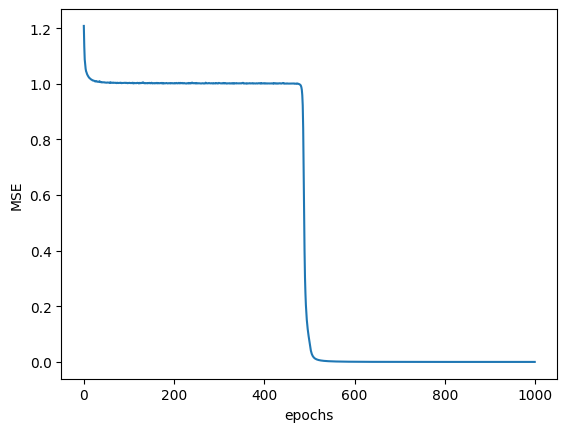

In [11]:
# Display learning curve
plt.figure()
plt.plot(history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')

In [12]:
pred = model.predict(ins)
pred

32/32 [==============================] - 0s 1ms/step


array([[-0.9993237 ],
       [ 0.99919546],
       [ 0.9991107 ],
       ...,
       [-0.9993258 ],
       [-0.9992891 ],
       [ 0.9993661 ]], dtype=float32)

In [13]:
errors = np.abs(pred - outs)

Text(0.5, 0, 'absolute error')

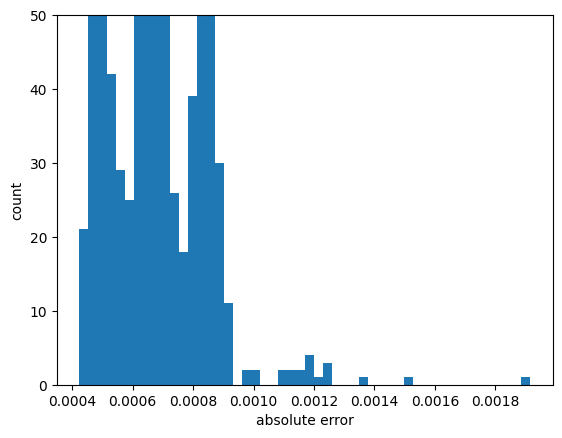

In [14]:
# Display error histogram
plt.figure()
plt.hist(errors, 50)
plt.ylim([0, 50])
plt.ylabel('count')
plt.xlabel('absolute error')
plt.savefig('foo.png')

Conclusion: sin must be a good activation function, so I should use it exclusively in every network I make this semester